In [ ]:
from skimage.io import imread
from skimage import img_as_float, data
from skimage.color import rgb2gray
from numpy import pad
from skimage.util import random_noise

import numpy as np

from scipy import signal

import matplotlib.pyplot as plt

In [ ]:
def plot_image(img,figsize=(5,5)):
    plt.figure(figsize=figsize)
    if len(img.shape)==2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("Image shape: ", img.shape)

def plot_kernel(kernel, cmap="Reds"):
    plt.imshow(kernel, interpolation='none', cmap="Reds")
    plt.colorbar()
    plt.show()
    print("Kernel shape: ", kernel.shape)

def gaussian2D(size, sigma):
  x = np.linspace(0, size, size)
  y = np.linspace(0, size, size)
  x1, y1 = np.meshgrid(x, y)
  z = np.exp(-((x1-size//2)**2+(y1-size//2)**2)/(2*(sigma**2)))
  z = z/((((2*np.pi)**0.5)*sigma)**2)

  return z

def box_kernel(size=5):
    return np.ones((size, size))/size**2

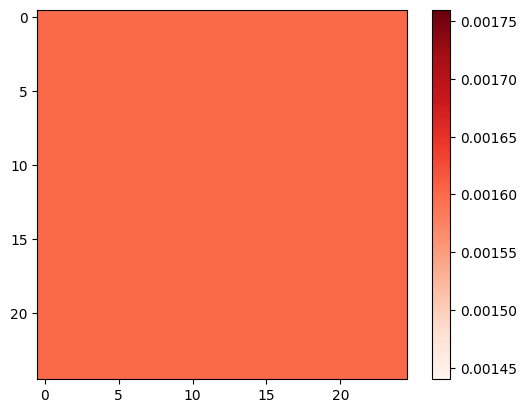

Kernel shape:  (25, 25)


In [ ]:
kernel1 = box_kernel(25)
plot_kernel(kernel1)

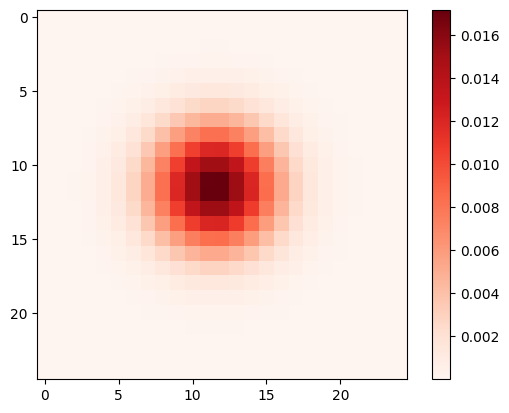

Kernel shape:  (25, 25)


In [ ]:
kernel2 = gaussian2D(25, 3)
plot_kernel(kernel2)

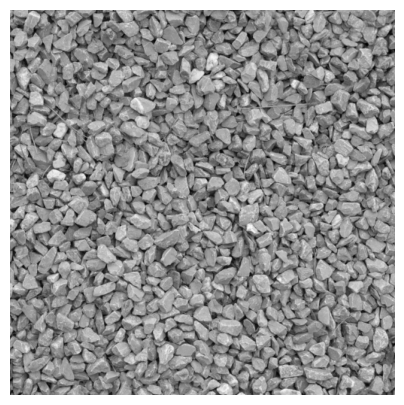

Image shape:  (512, 512)


In [ ]:
img_gray = data.gravel()
plot_image(img_gray)

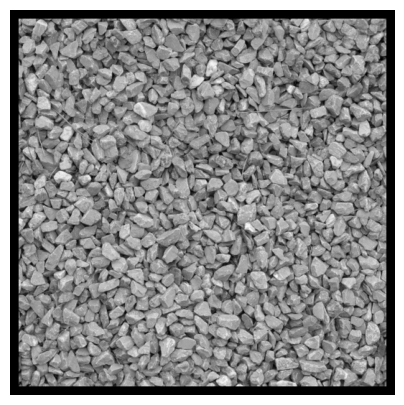

Image shape:  (536, 536)


In [ ]:
padding = int((25-1)/2)
padded_img = pad(img_gray, pad_width=[(padding, padding), (padding, padding)], mode='constant', constant_values=0)
plot_image(padded_img)

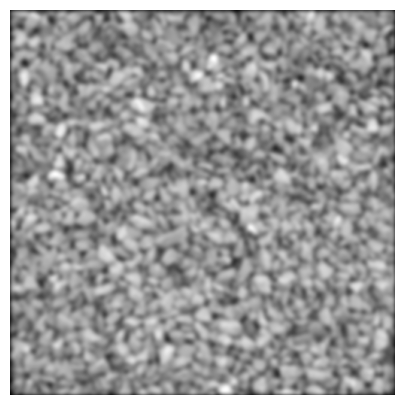

Image shape:  (512, 512)


In [ ]:
filtered_img = signal.correlate(padded_img, kernel2, mode='valid')
plot_image(filtered_img)

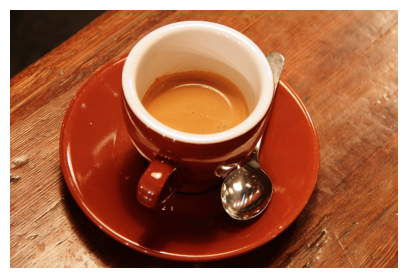

Image shape:  (400, 600, 3)


In [ ]:
img_colored = data.coffee()
plot_image(img_colored)

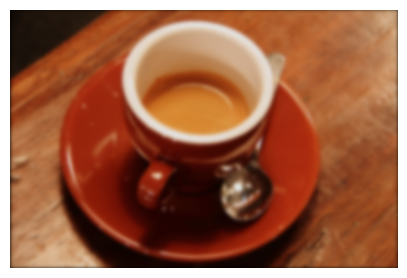

Image shape:  (400, 600, 3)


In [ ]:
filtered_img = np.zeros_like(img_colored)

for i in range(img_colored.shape[-1]):
  padded_img = pad(img_colored[:,:,i], pad_width=[(padding, padding), (padding, padding)], mode='constant', constant_values=0)
  filtered_img[:,:,i] = signal.correlate(padded_img, kernel2, mode='valid')

plot_image(filtered_img)

In [ ]:
zero_padded = pad(img_colored, pad_width=[(200,200), (200,200), (0,0)], mode='constant', constant_values=0)
gray_padded = pad(img_colored, pad_width=[(200,200), (200,200), (0,0)], mode='constant', constant_values=200)
mirror_padded = pad(img_colored, pad_width=[(200,200), (200,200), (0,0)], mode='reflect')
edge_padded = pad(img_colored, pad_width=[(200,200), (200,200), (0,0)], mode='edge')
linear_ramp_padded = pad(img_colored, pad_width=[(200,200), (200,200), (0,0)], mode='linear_ramp')

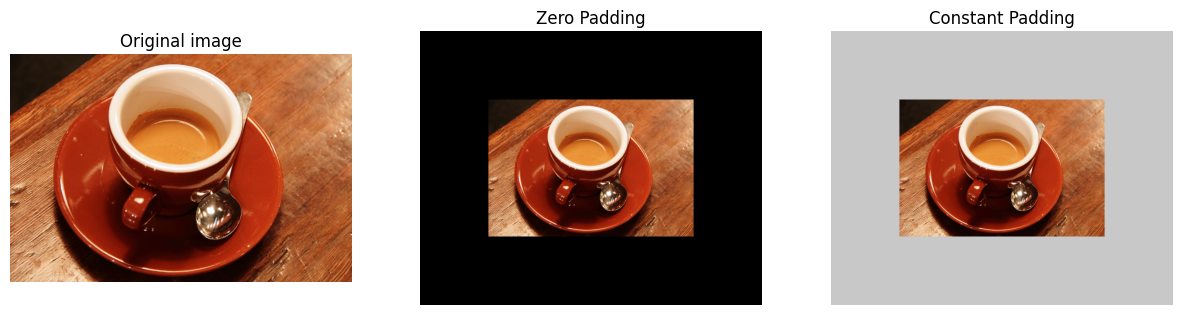

Text(0.5, 1.0, 'Linear Ramp Padding')

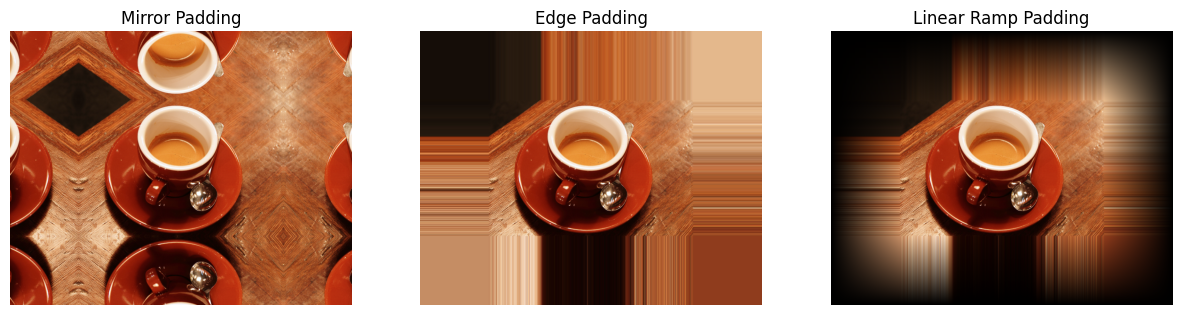

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(img_colored)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,3,2)
plt.imshow(zero_padded)
plt.axis('off')
plt.title('Zero Padding')

plt.subplot(1,3,3)
plt.imshow(gray_padded)
plt.axis('off')
plt.title('Constant Padding')

plt.show()

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(mirror_padded)
plt.axis('off')
plt.title('Mirror Padding')

plt.subplot(1,3,2)
plt.imshow(edge_padded)
plt.axis('off')
plt.title('Edge Padding')

plt.subplot(1,3,3)
plt.imshow(linear_ramp_padded)
plt.axis('off')
plt.title('Linear Ramp Padding')

In [ ]:
filter_sizes = [15, 45, 85, 115]

# Effect of Box Filter (varying filter sizes)
img_list = [np.zeros_like(img_colored) for _ in range(len(filter_sizes))]
filtered_imgs_box = np.stack(img_list, axis=-1)

for i,unique_size in enumerate(filter_sizes):
  unique_box_filter = box_kernel(unique_size)
  for j in range(img_colored.shape[-1]):
    filtered_imgs_box[:,:,j,i] = signal.correlate(img_colored[:,:,j], unique_box_filter, mode='same')

# Effect of Gaussian Filter (varying filter sizes)
img_list = [np.zeros_like(img_colored) for _ in range(len(filter_sizes))]
filtered_imgs_gaussian = np.stack(img_list, axis=-1)

for i,unique_size in enumerate(filter_sizes):
  unique_gaussian_filter = gaussian2D(unique_size, 5)
  for j in range(img_colored.shape[-1]):
    filtered_imgs_gaussian[:,:,j,i] = signal.correlate(img_colored[:,:,j], unique_gaussian_filter, mode='same')

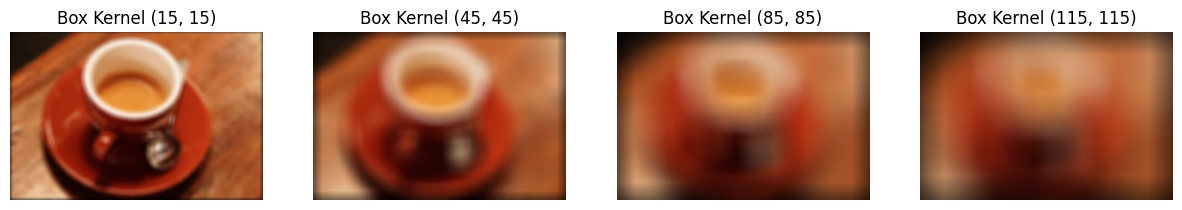

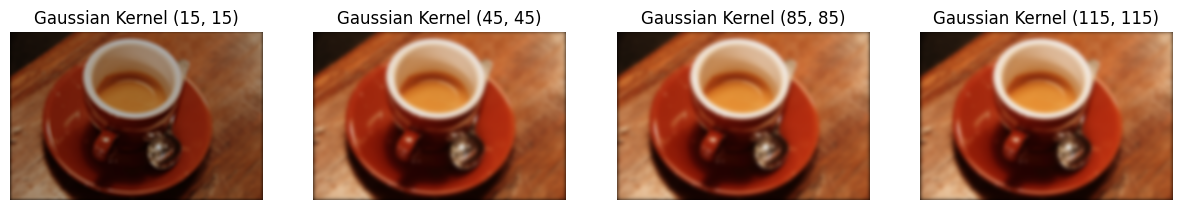

In [ ]:
plt.figure(figsize=(15,15))
for i in range(len(filter_sizes)):
  plt.subplot(1, len(filter_sizes), i+1)
  plt.imshow(filtered_imgs_box[:,:,:,i])
  plt.axis('off')
  plt.title(f"Box Kernel ({filter_sizes[i]}, {filter_sizes[i]})")

plt.figure(figsize=(15,15))
for i in range(len(filter_sizes)):
  plt.subplot(1, len(filter_sizes), i+1)
  plt.imshow(filtered_imgs_gaussian[:,:,:,i])
  plt.axis('off')
  plt.title(f"Gaussian Kernel ({filter_sizes[i]}, {filter_sizes[i]})")

In [ ]:
noisy_image = random_noise(img_gray, mode='s&p')
kernel = gaussian2D(15, 1)
denoised_image_gaussian = signal.correlate(noisy_image, kernel, mode='same')

Text(0.5, 1.0, 'Denoised Image (Gaussian)')

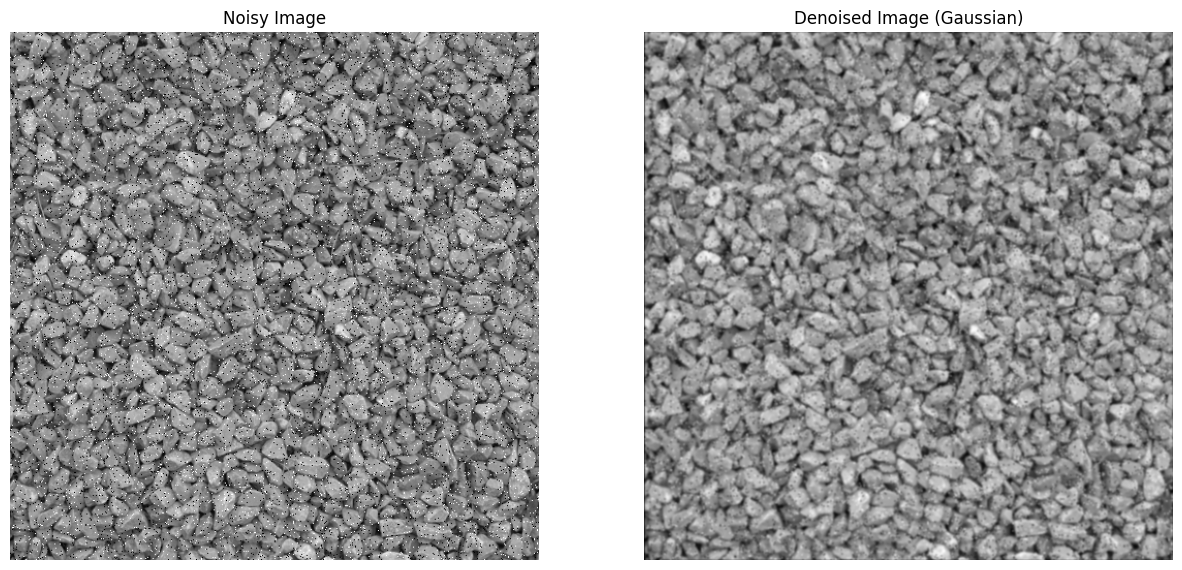

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.title("Noisy Image")

plt.subplot(1,2,2)
plt.imshow(denoised_image_gaussian, cmap='gray')
plt.axis('off')
plt.title("Denoised Image (Gaussian)")

In [ ]:
from skimage.filters import median

In [ ]:
denoised_image_median = median(noisy_image)

Text(0.5, 1.0, 'Denoised Image (Median)')

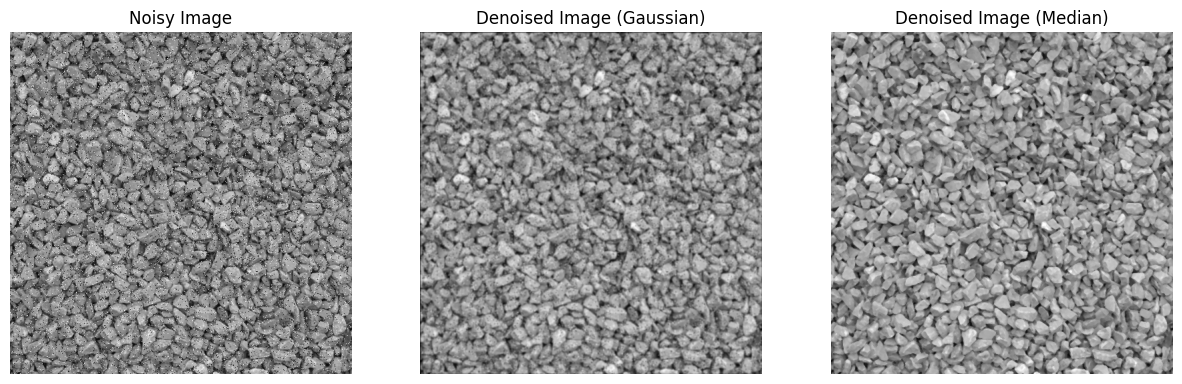

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.title("Noisy Image")

plt.subplot(1,3,2)
plt.imshow(denoised_image_gaussian, cmap='gray')
plt.axis('off')
plt.title("Denoised Image (Gaussian)")

plt.subplot(1,3,3)
plt.imshow(denoised_image_median, cmap='gray')
plt.axis('off')
plt.title("Denoised Image (Median)")